В данной лабораторной работе сравнивается работа алгоритма WА* с разными значениями параметра w (фактор субоптимальности), в том числе w=1, что соответствует А*. Для сравнительного тестирования были выбраны <i>3 карты</i>. Для каждой из карт проводится <i>100 тестов различной сложности, выбранных случайным образом</i>, при этом 20 из них заведомо высокой сложности, после чего по итогам работы алгоритма сравниваются полученные выходные данные для разных w и делаются выводы, насколько сильно мы теряем в качестве решения (длине пути) и при этом приобретаем в вычислительной эффективности (решение ищется быстрее).  
В качестве версии алгоритма выбрана версия <b>без перераскрытий</b> с эвристикой <b>octile distance</b>. <i>Граф - 8-связный</i> (разрешены ортогональные и диагональные переходы), <i>без срезания углов</i>.  
Посмотрим на карты, на которых будет разворачиваться всё действо:

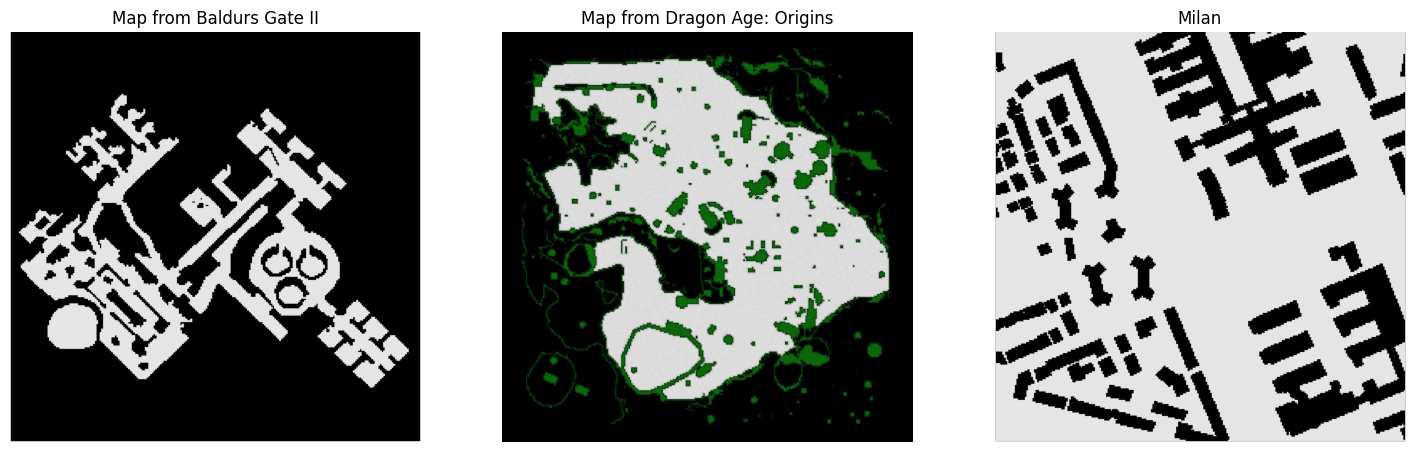

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = ['map_pictures/AR0406SR.png', 'map_pictures/brc000d.jpg', 'map_pictures/Milan_2_256.png']  # Add your image paths here
titles = ['Map from Baldurs Gate II', 'Map from Dragon Age: Origins', 'Milan']
fig, axes = plt.subplots(1, 3, figsize=(18, 18))
for ax, path, title in zip(axes, image_paths, titles):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(title)  
    ax.axis('off')

Для всесторонней оценки проводимых тестов достаточно важно, что топологии этих карт визуально различаются.  
Карта из компьютерной игры Baldurs Gate II имеет довольно узкие проходы, что должно задавать путям между парами вершин точность и стремительность, хотя имеются и тупики, в которые из определенных точек карты может быть легко попасть. 
Вторая карта, карта из игры Dragon Age: Origins, уже не так изобилует сложными ходами, но трудности могут представлять 3 больших выпуклости в левой части карты. 
Топология карты части города Милан отличается от предыдущих - ближе к краям карта локально кажется похожей в разных своих точках, имея также свои небольшие тупики в левой части и тупики побольше в правой, а центр карты кажется местом, куда "ведут все дороги" и откуда легко расходиться к краям, территория на которых уже относительно запутывающая.

Сразу покажем графики, по которым можно судить о характеристиках работы исполненного алгоритма.

В качестве эталона берется А*, и все полученные в ходе работы WA* значения рассматриваются в терминах количества процентов, которое эти значения составляют от значений, полученных в А*. То есть, для А* - всегда 100%, для WA* - варьируется.
Для наглядности графики были обработаны - сначала для разбиения на отрезки длины 5 были усреднены значения х и у по каждому из отрезков, затем прошлись скользящим средним с окном длины 5, и, наконец, произвели сглаживание.

Следующие графики показывают зависимость стоимости пути от сложности задачи и от фактора суб-оптимальности w для разных карт:

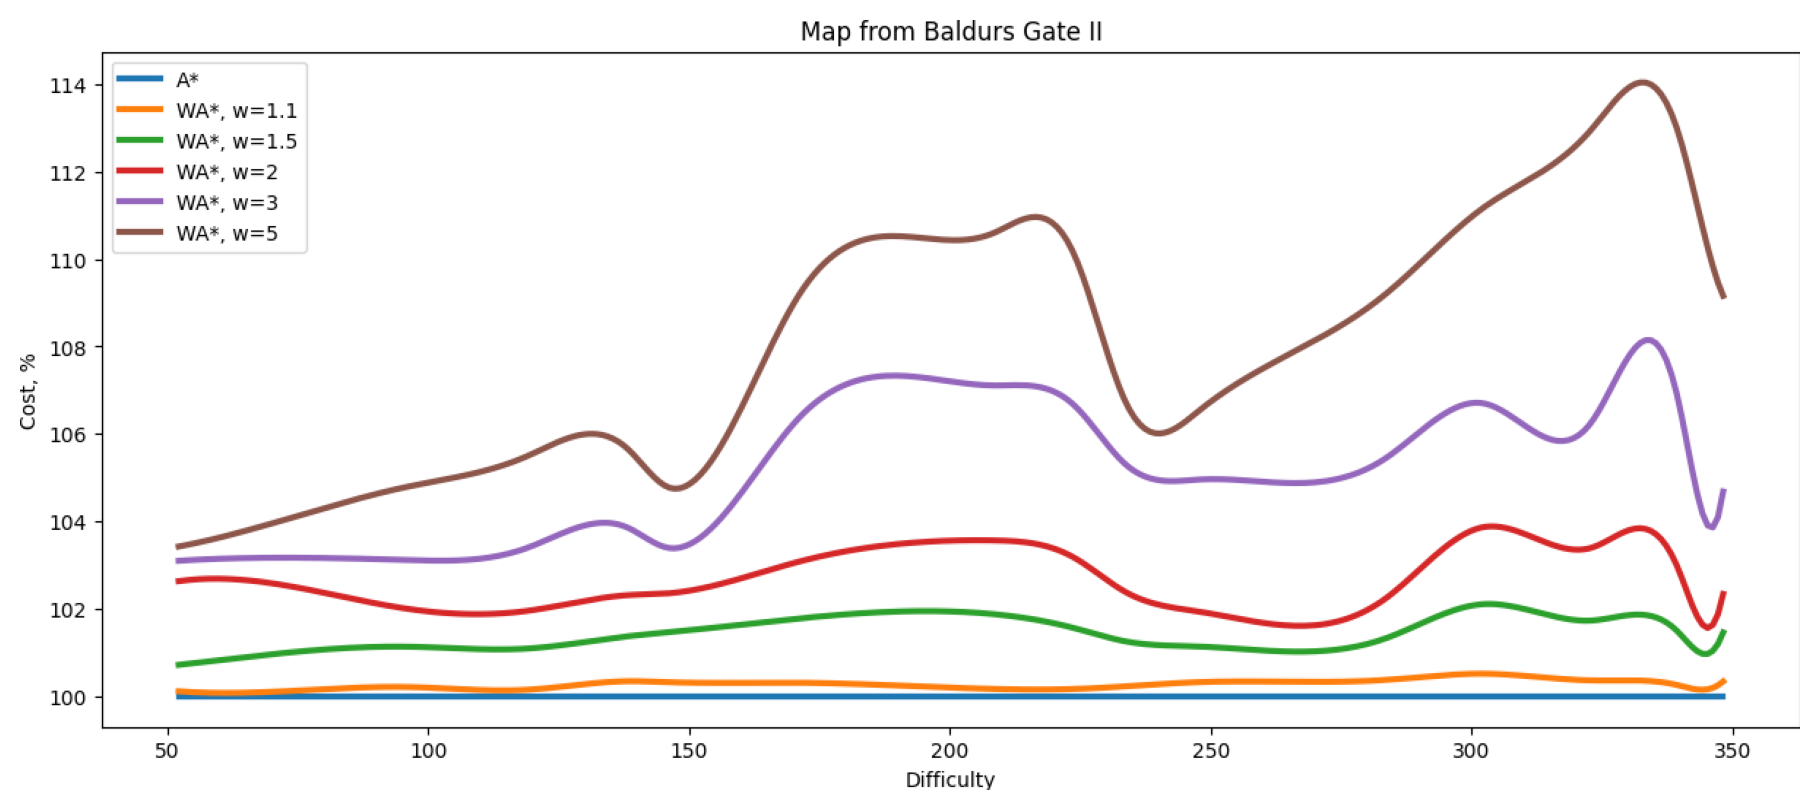

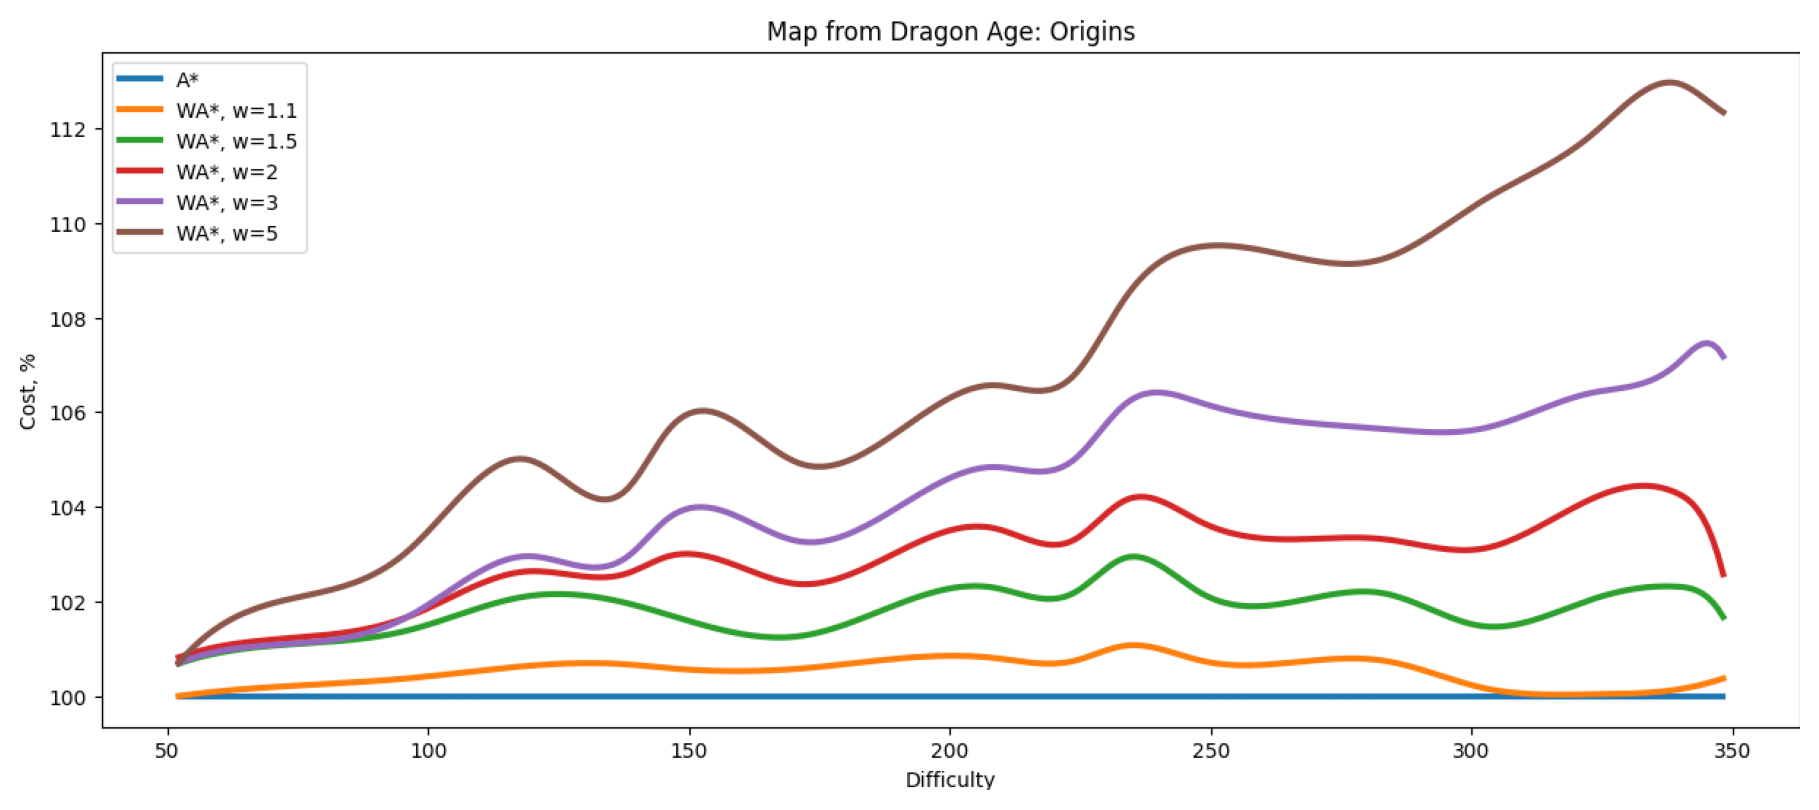

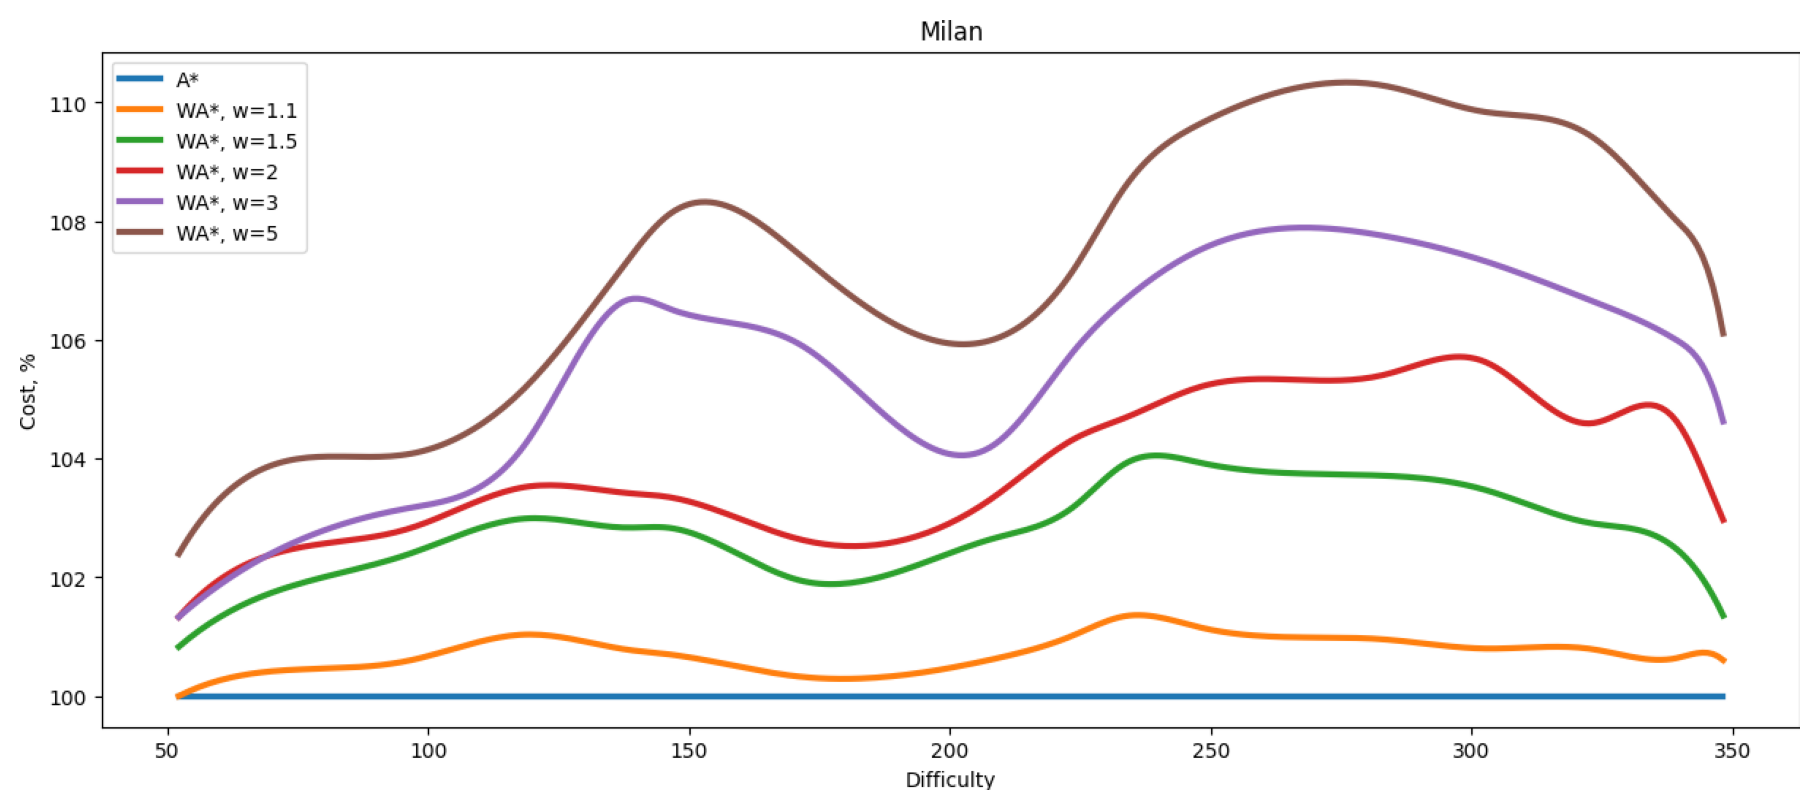

In [150]:
for i in range(3):
    img = mpimg.imread(f'results/graph{i+1}_cost.png')
    plt.figure(figsize=(16, 5), dpi=200) 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Так как А* при наших условиях всегда находит кратчайший путь, понятно, что стоимости найденных WA* путей могли только увеличиться. Можно увидеть, что с возрастанием w графики перестают вести себя примерно линейно и начинают допускать пики в своих значениях. Оно и понятно, ведь большое w, большой вес эвристики, как бы допускает больше свободы при выборе вершины для раскрытия, и очень легко может оказаться, что вершина, которая на самом деле наиболее оптимальна для раскрытия, имеет больший вес, так как отстоит чуть дальше от финиша, чем та, которую выбирает для раскрытия WA*, особенно если между стартом и финишем много сильно расходящихся путей. Для карты из Dragon Age видна квазимонотонность, и меньше "непредсказуемых пиков", чем для остальных двух карт. Возможно, это объясняется тем что карта допускает не так много расходящихся путей между двумя разными точками, так как карта относительно чистая, а препятствия достаточно малы и огибаются без того, чтобы прибавлять много в стоимости искомого пути. Карта из Baldurs Gate и карта Милана же представляют собой своего рода лабиринт, в котором легко пойти не тем путем и заработать лишней стоимости. 

И посмотрим также на графики зависимости времени выполнения алгоритма и числа раскрытий вершин от сложности задачи и от фактора суб-оптимальности w для разных карт:

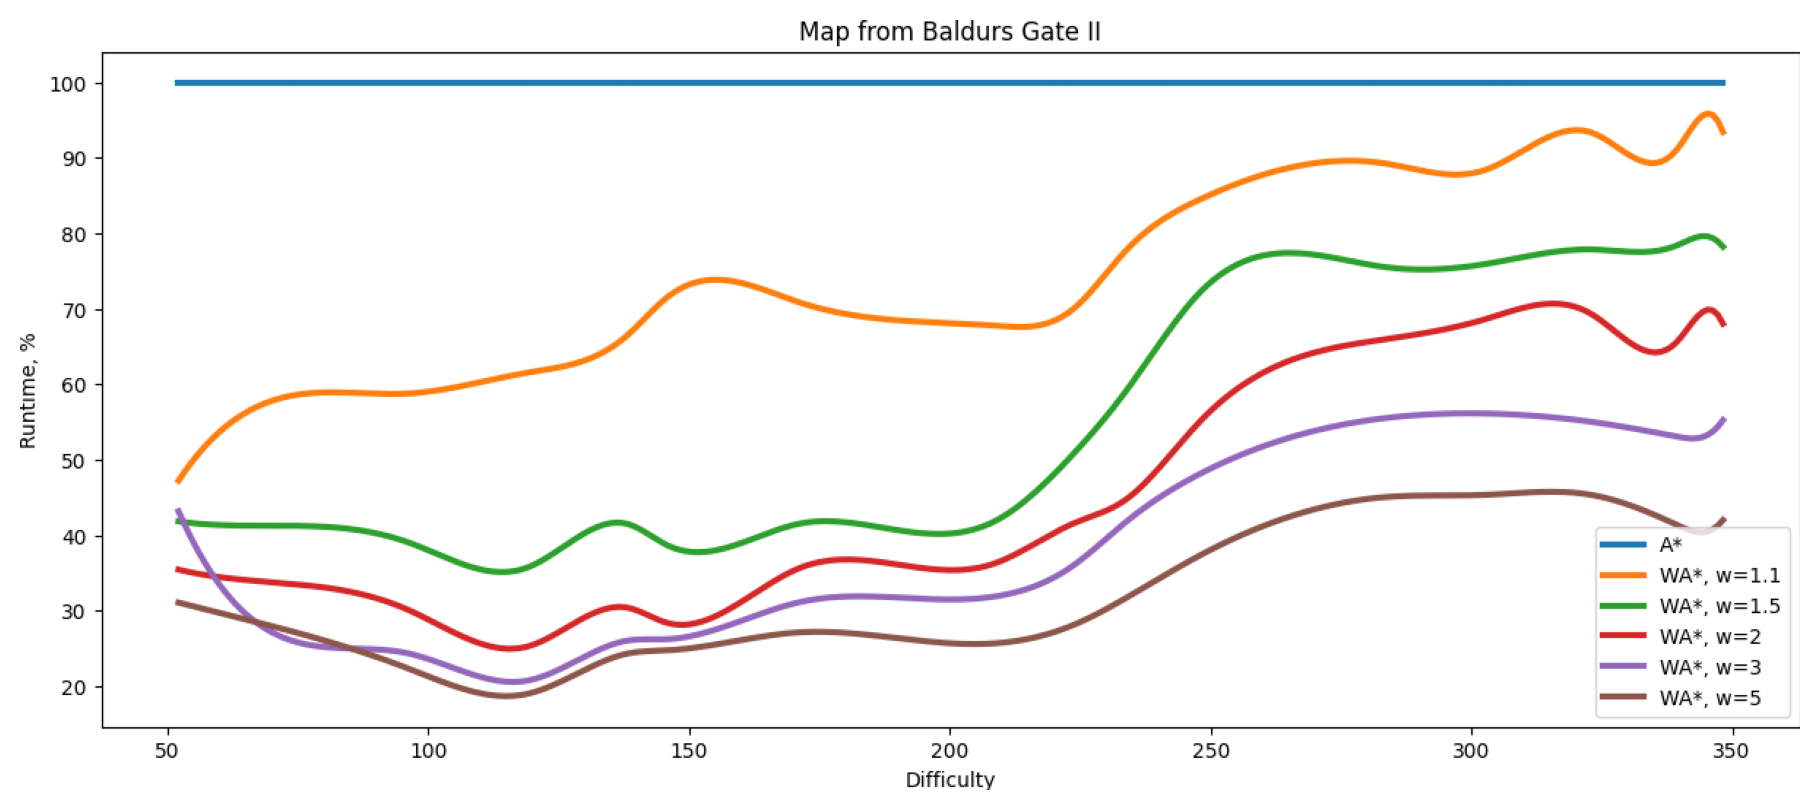

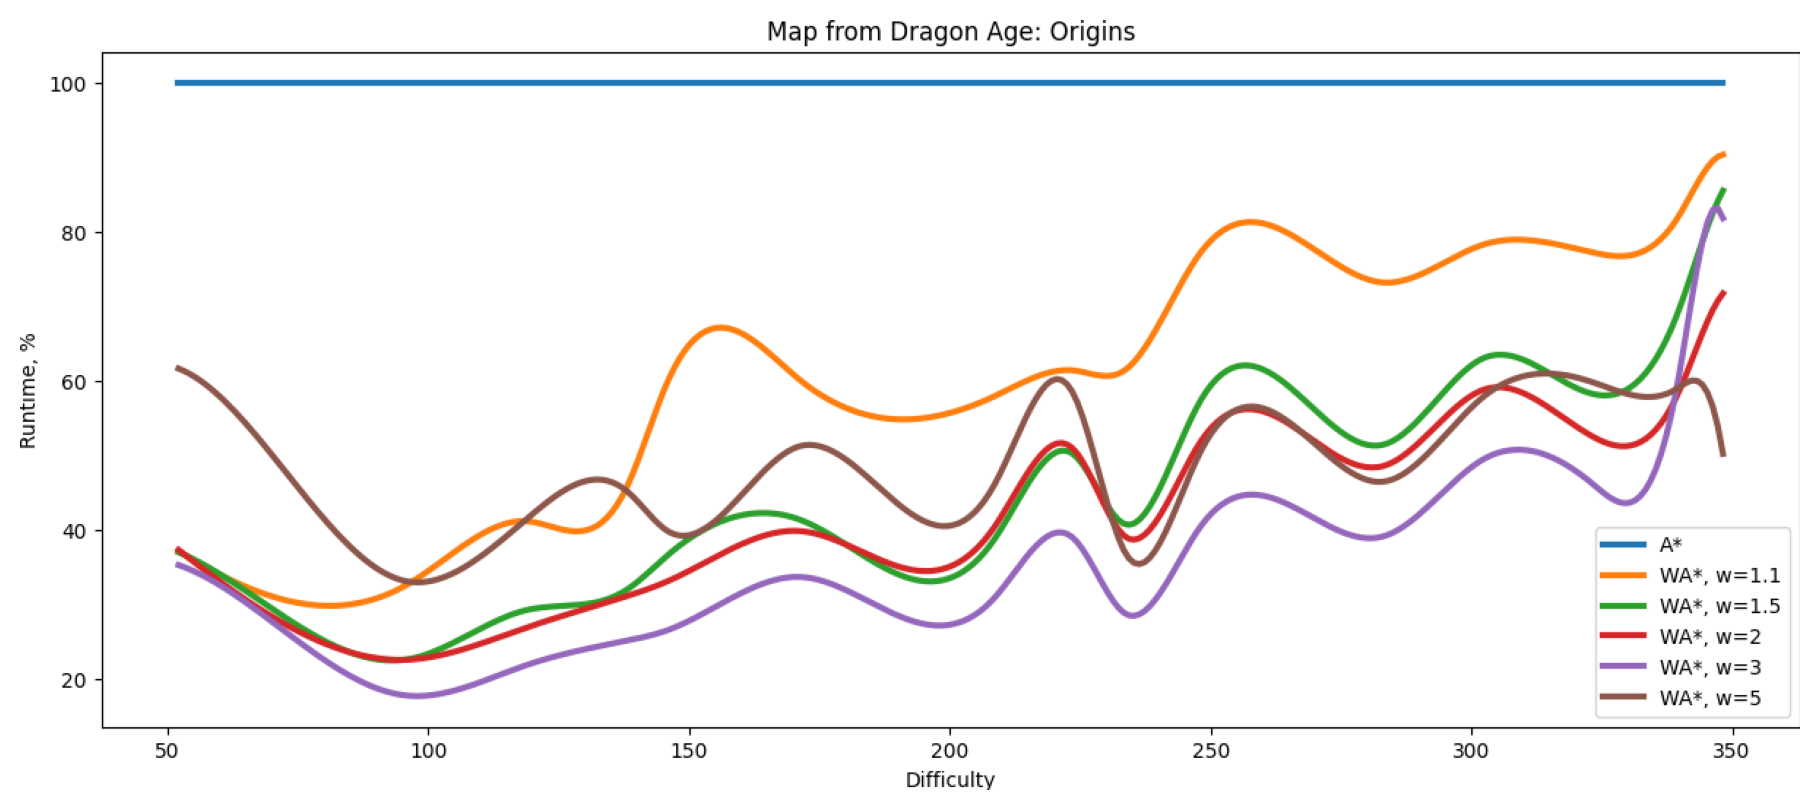

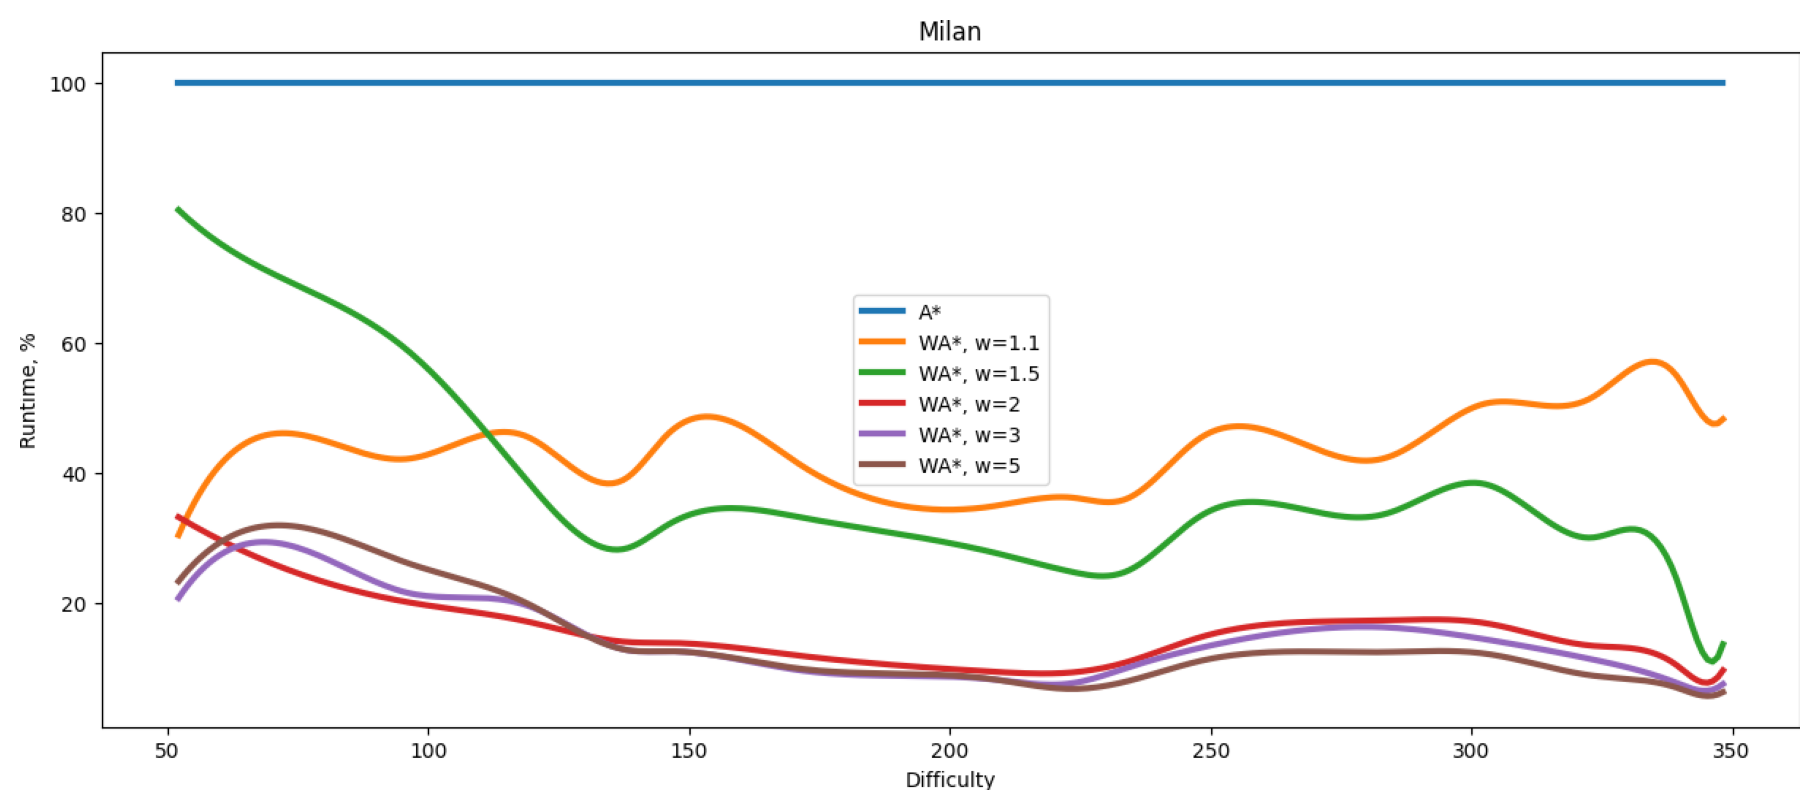

In [155]:
for i in range(3):
    img = mpimg.imread(f'results/graph{i+1}_runtime.png')
    plt.figure(figsize=(16, 5), dpi=200) 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

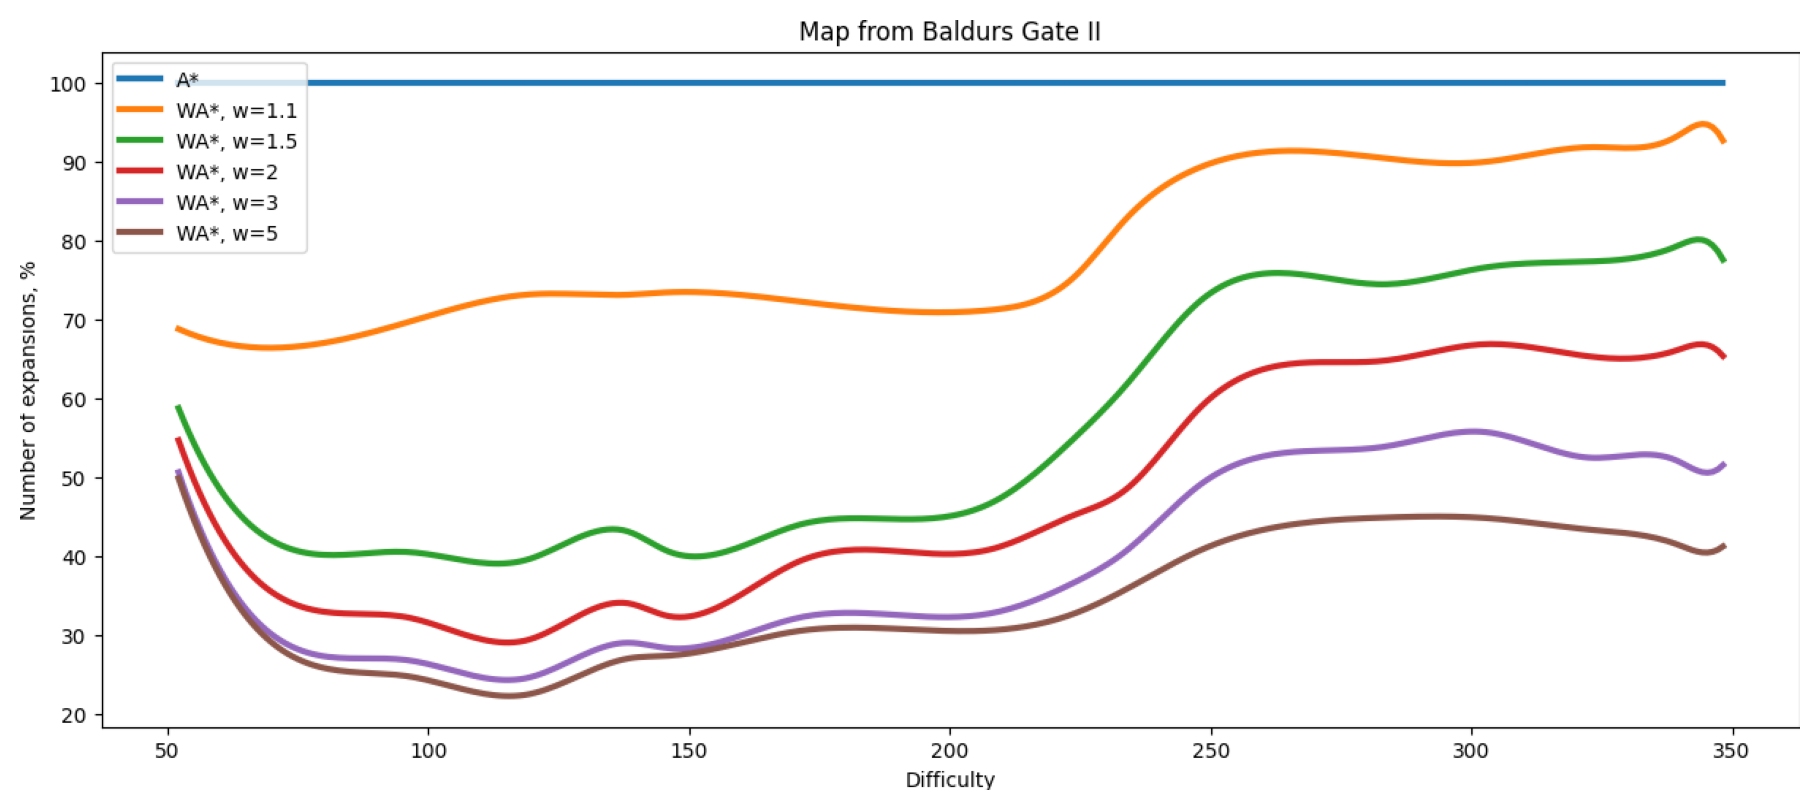

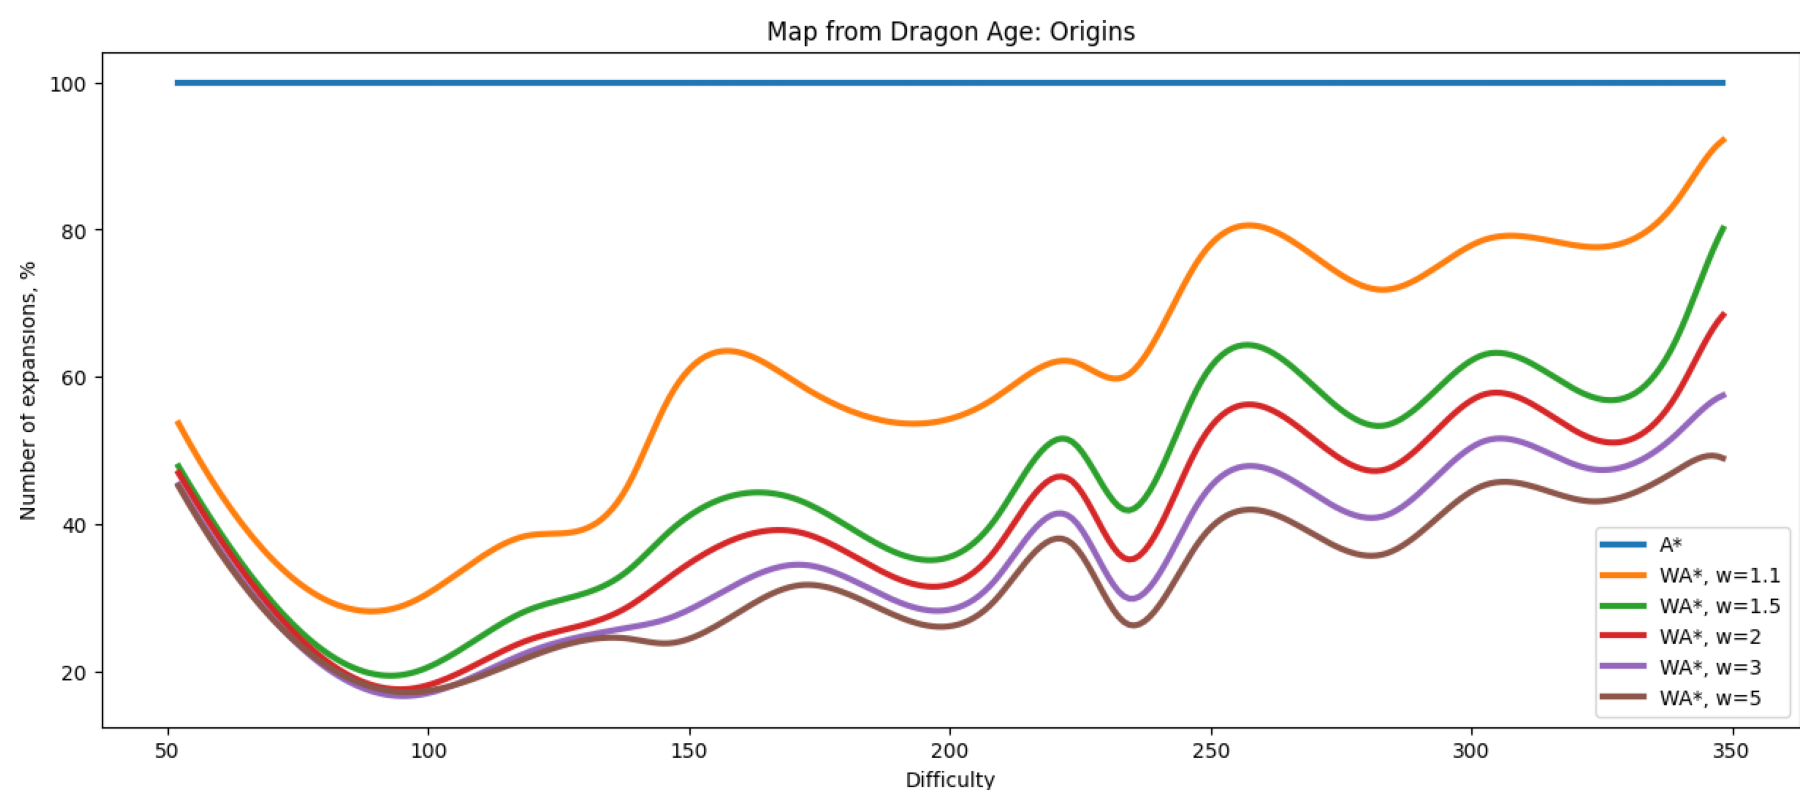

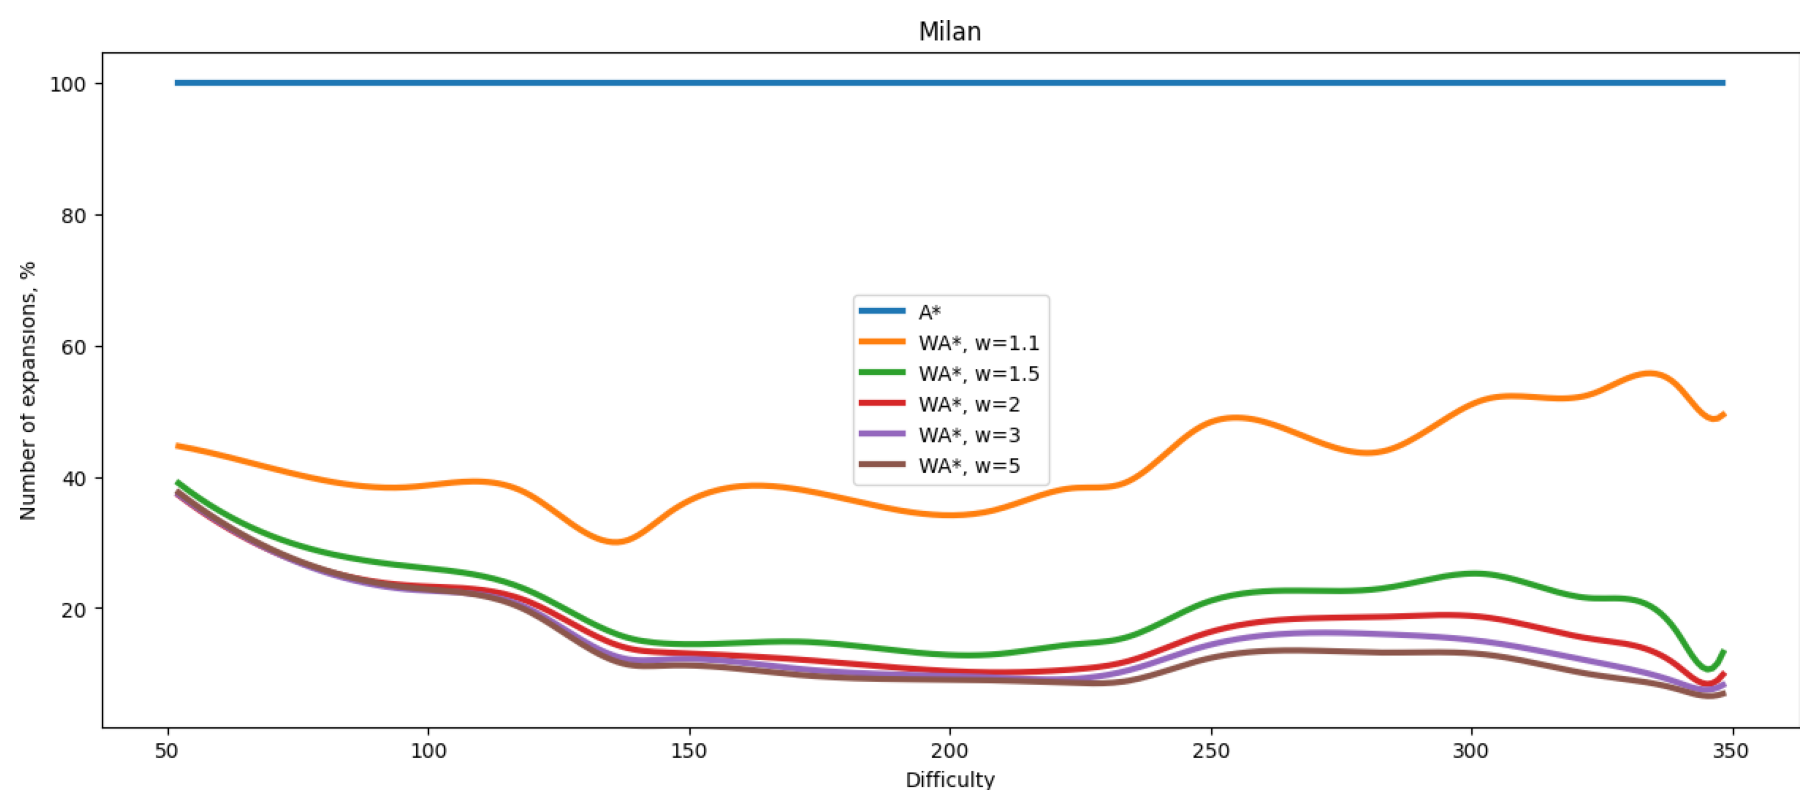

In [156]:
for i in range(3):
    img = mpimg.imread(f'results/graph{i+1}_num_exp.png')
    plt.figure(figsize=(16, 5), dpi=200) 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Видно, что при увеличении w мы в основном начинаем выигрывать по времени работы алгоритма и числу раскрытий вершин. Однако для первых двух карт при увеличении сложности задачи мы все ближе подбираемся к эталонной прямой для А*. Возможно, это происходит потому, что с w>1 появляется больше "свободы", больше раскрывается лишних вершин и чаще алгоритм заходит в тупик, выйти из которого может лишь ища новый путь, разветвляющийся от текущего в очень давно раскрытой вершине, тратя лишнее время и раскрывая новые вершины. Но для разных w при этом бо́льшие значения оказываются выгоднее маленьких, т.к. позволяют алгоритму проявлять большую "небрежность" в поиске пути и меньше зацикливаться на его стоимости.

<b>Итоги</b>

Выбор фактора суб-оптимальности означает некий трейд-офф между тем, насколько вырастет стоимость пути и насколько мы выиграем по времени работы и количеству раскрытий вершин. Однако наши результаты показывают, что неразумно выбирать один и тот же фактор для всех на свете карт, и нужно смотреть на поведение алгоритма на конкретной местности

In [2]:
import random
import traceback
from heapq import heappop, heappush
from pathlib import Path
from textwrap import dedent
from typing import Callable, Dict, Iterable, List, Optional, Tuple, Type, Union
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.typing as npt
import pandas as pd
from PIL import Image, ImageDraw

from joblib import Parallel, delayed
import os

%matplotlib inline

random.seed(331)

In [3]:
class Map:
    """
    Represents a square grid environment for our moving agent.

    Attributes
    ----------
    _width : int
        The number of columns in the grid.

    _height : int
        The number of rows in the grid.

    _cells : np.ndarray
        A binary matrix representing the grid where 0 represents a traversable cell, and 1 represents a blocked cell.
    """

    def __init__(self, cells: npt.NDArray):
        """
        Initializes the map using a 2D array of cells.

        Parameters
        ----------
        cells : np.ndarray
            A binary matrix representing the grid. 0 indicates a traversable cell, and 1 indicates a blocked cell.
        """
        self._width = cells.shape[1]
        self._height = cells.shape[0]
        self._cells = cells

    def in_bounds(self, i: int, j: int) -> bool:
        """
        Checks if the cell (i, j) is within the grid boundaries.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        bool
            True if the cell is inside the grid, False otherwise.
        """
        return 0 <= j < self._width and 0 <= i < self._height

    def traversable(self, i: int, j: int) -> bool:
        """
        Checks if the cell (i, j) is not an obstacle.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        bool
            True if the cell is traversable, False if it's blocked.
        """
        return not self._cells[i, j]

    def not_angle_separated(self, i1: int, j1: int, i2: int, j2: int) -> bool:
        """
        Checks if the cells (i1, j1) and (i2, j2) are diagonally adjacent and not angle-separated.

        Parameters
        ----------
        i1 : int
            Row number of the first cell in the grid.
        j1 : int
            Column number of the first cell in the grid.
        i2 : int
            Row number of the second cell in the grid.
        j2 : int
            Column number of the second cell in the grid.

        Returns
        ----------
        bool
            True if the cells are diagonally adjacent and not angle-separated.
        """
        return (abs(i1 - i2) == 1 and abs(j1 - j2) == 1 
                and self.in_bounds(i1, j2) and self.traversable(i1, j2)
                and self.in_bounds(i2, j1) and self.traversable(i2, j1))
    
    def get_neighbors(self, i: int, j: int) -> List[Tuple[int, int]]:
        """
        Gets a list of neighboring cells as (i, j) tuples.
        Assumes that the grid is 4-connected, allowing moves only in cardinal directions.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        neighbors : List[Tuple[int, int]]
            List of neighboring cells.
        """
        neighbors = []
        delta = ((0, 1), (1, 0), (0, -1), (-1, 0)) 
        for dx, dy in delta:
            ni, nj = i + dx, j + dy
            if self.in_bounds(ni, nj) and self.traversable(ni, nj):
                neighbors.append((ni, nj))
        delta = ((-1, -1), (-1, 1), (1, -1), (1, 1))
        for dx, dy in delta:
            ni, nj = i + dx, j + dy
            if self.in_bounds(ni, nj) and self.traversable(ni, nj) and self.not_angle_separated(i, j, ni, nj):
                neighbors.append((ni, nj))
        return neighbors

    def get_size(self) -> Tuple[int, int]:
        """
        Returns the size of the grid in cells.

        Returns
        ----------
        (height, width) : Tuple[int, int]
            Number of rows and columns in the grid.
        """
        return self._height, self._width

In [4]:
def convert_string_to_cells(cell_str: str) -> npt.NDArray:
    """
    Converts a string representation of a grid map, with '#' for obstacles and '.' for free cells, into a binary matrix.

    Parameters
    ----------
    cell_str : str
        String containing grid map information ('#' for obstacles and '.' for free cells).

    Returns
    ----------
    cells : np.ndarray
        Binary matrix representing the grid map.
    """
    lines = cell_str.replace(" ", "").split("\n")

    cells = np.array(
        [[0 if char in (".", "G") else 1 for char in line] for line in lines if line],
        dtype=np.int8,
    )
    return cells

In [5]:
def compute_cost(i1: int, j1: int, i2: int, j2: int) -> Union[int, float]:
    """
    Computes the cost of simple moves between cells (i1, j1) and (i2, j2).

    Parameters
    ----------
    i1 : int
        Row number of the first cell in the grid.
    j1 : int
        Column number of the first cell in the grid.
    i2 : int
        Row number of the second cell in the grid.
    j2 : int
        Column number of the second cell in the grid.

    Returns
    ----------
    int | float
        Cost of the move between cells.

    Raises
    ----------
    ValueError
        If trying to compute the cost of a non-supported move (only cardinal moves are supported).
    """
    if abs(i1 - i2) + abs(j1 - j2) == 1:
        return 1
    elif abs(i1 - i2) == 1 and abs(j1 - j2) == 1:
        return np.sqrt(2)
    else:
        raise ValueError("Trying to compute the cost of a non-supported move! ONLY cardinal moves are supported.")

In [6]:
class Node:
    """
    Represents a search node.

    Attributes
    ----------
    i : int
        Row coordinate of the corresponding grid element.
    j : int
        Column coordinate of the corresponding grid element.
    g : float | int
        g-value of the node.
    h : float | int
        h-value of the node
    f : float | int
        f-value of the node
    parent : Node
        Pointer to the parent node.
    """

    def __init__(
        self,
        i: int,
        j: int,
        g: Union[float, int] = 0,
        h: Union[float, int] = 0,
        f: Optional[Union[float, int]] = None,
        parent: "Node" = None,
    ):
        """
        Initializes a search node.

        Parameters
        ----------
        i : int
            Row coordinate of the corresponding grid element.
        j : int
            Column coordinate of the corresponding grid element.
        g : float | int
            g-value of the node.
        h : float | int
            h-value of the node (always 0 for Dijkstra).
        f : float | int
            f-value of the node (always equal to g-value for Dijkstra).
        parent : Node
            Pointer to the parent node.
        """
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        if f is None:
            self.f = self.g + h
        else:
            self.f = f
        self.parent = parent

    def __eq__(self, other):
        """
        Checks if two search nodes are the same, which is needed to detect duplicates in the search tree.
        """
        return self.i == other.i and self.j == other.j

    def __hash__(self):
        """
        Makes the Node object hashable, allowing it to be used in sets/dictionaries.
        """
        return hash((self.i, self.j))

    def __lt__(self, other):
        """
        Compares the f- and g-values of two nodes, needed for sorting/extracting the best element from OPEN, using g_max tie-breaker.
        """
        if self.f == other.f:
            return self.g > other.g
        return self.f < other.f

In [7]:
class SearchTreePQD:
    """
    SearchTree using a priority queue for OPEN and a dictionary for CLOSED.
    """

    def __init__(self):
        self._open = []  # Priority queue for nodes in OPEN
        self._closed = {}  # Dictionary for nodes in CLOSED (expanded nodes)
        self._enc_open_dublicates = 0  # Number of dublicates encountered in OPEN

    def __len__(self) -> int:
        """
        Returns the size of the search tree. Useful for assessing the memory
        footprint of the algorithm, especially at the final iteration.
        """
        return len(self._open) + len(self._closed)

    def open_is_empty(self) -> bool:
        """
        Checks if OPEN is empty.
        If true, the main search loop should be interrupted.
        """
        return len(self._open) == 0

    def add_to_open(self, item: Node):
        """
        Adds a node to the search tree, specifically to OPEN. This node is either
        entirely new or a duplicate of an existing node in OPEN.
        This implementation detects duplicates lazily; thus, nodes are added to
        OPEN without initial duplicate checks.
        """
        heappush(self._open, item)

    def get_best_node_from_open(self) -> Optional[Node]:
        """
        Retrieves the best node from OPEN, defined by the minimum key.
        This node will then be expanded in the main search loop.

        Duplicates are managed here. If a node has been expanded previously
        (and is in CLOSED), it's skipped and the next best node is considered.

        Returns None if OPEN is empty.
        """
        while not self.open_is_empty():
            best = heappop(self._open)
            if not self.was_expanded(best):
                return best
            self._enc_open_dublicates += 1

    def add_to_closed(self, item: Node):
        """
        Adds a node to the CLOSED dictionary.
        """
        self._closed[hash(item)] = item

    def was_expanded(self, item: Node) -> bool:
        """
        Checks if a node has been previously expanded.
        """
        return hash(item) in self._closed

    @property
    def opened(self):
        return self._open

    @property
    def expanded(self):
        return self._closed.values()

    @property
    def number_of_open_dublicates(self):
        return self._enc_open_dublicates

Напишем функцию для эвристики octile, которая будет использована в WA*:

In [10]:
def octile_distance(i1: int, j1: int, i2: int, j2: int) -> float:
    return 1.414 * min(abs(i1 - i2), abs(j1 - j2)) + abs(abs(i1 - i2) - abs(j1 - j2))

А также определим значения фактора субоптимальности w, с которыми будем запускать наш алгоритм:

In [11]:
W = [1, 1.1, 1.5, 2, 3, 5]

In [12]:
def wastar(
    task_map: Map,
    start_i: int,
    start_j: int,
    goal_i: int,
    goal_j: int,
    heuristic_func: Callable,
    w: float,
    search_tree: Type[SearchTreePQD],
) -> Tuple[bool, Optional[Node], int, int, Optional[Iterable[Node]], Optional[Iterable[Node]]]:
    """
    Implements the WA* search algorithm.

    Parameters
    ----------
    task_map : Map
        The grid or map being searched.
    start_i, start_j : int, int
        Starting coordinates.
    goal_i, goal_j : int, int
        Goal coordinates.
    heuristic_func : Callable
        Heuristic function for estimating the distance from a node to the goal.
    w: float
        Sub-optimality factor.
    search_tree : Type[SearchTreePQD]
        The search tree to use.

    Returns
    -------
    Tuple[bool, Optional[Node], int, int, Optional[Iterable[Node]], Optional[Iterable[Node]]]
        Tuple containing:
        - A boolean indicating if a path was found.
        - The last node in the found path or None.
        - Number of algorithm iterations.
        - Size of the resultant search tree.
        - OPEN set nodes for visualization or None.
        - CLOSED set nodes.
    """
    ast = search_tree()
    steps = 0

    start_node = Node(start_i, start_j, g=0, h=heuristic_func(start_i, start_j, goal_i, goal_j))
    goal_node = Node(goal_i, goal_j, g=float('inf'), h=0)
    ast.add_to_open(start_node)

    while not ast.open_is_empty():
        steps += 1
        best = ast.get_best_node_from_open()
        if best is None:
            return False, None, steps, len(ast), None, ast.expanded
        if best == goal_node:
            return True, best, steps, len(ast), ast.opened, ast.expanded
        for i, j in task_map.get_neighbors(best.i, best.j):
            new_node = Node(i, j)
            if not ast.was_expanded(new_node):
                new_node.g = best.g + (compute_cost(best.i, best.j, i, j))
                new_node.h = w * heuristic_func(i, j, goal_i, goal_j)
                new_node.f = new_node.g + new_node.h
                new_node.parent = best
                ast.add_to_open(new_node)
        ast.add_to_closed(best)

    return False, None, steps, len(ast), None, ast.expanded

In [13]:
maps = [("map_schemes/AR0406SR.map", "map_schemes/AR0406SR.map.scen", "Map from Baldurs Gate II"),
        ("map_schemes/brc000d.map", "map_schemes/brc000d.map.scen", "Map from Dragon Age: Origins"),
        ("map_schemes/Milan_2_256.map", "map_schemes/Milan_2_256.map.scen", "Milan")]

In [31]:
statistics_wastar = dict()
statistics_astar = dict()
used_tests = dict()
for m in maps:
    with open(m[0]) as f:
        for _ in range(4):
            f.readline()
        cells = convert_string_to_cells("".join(f.readlines()))
        terrain = Map(cells)
    with open(m[1]) as f:
        all_tests = f.readlines()
        used_tests[m[2]] = random.sample(range(1, len(all_tests) - 51), 80) + random.sample(range(len(all_tests) - 51, len(all_tests) - 1), 20) 
    for w in W:
        for i in used_tests[m[2]]:
            test = list(all_tests[i].split())
            start_j, start_i, goal_j, goal_i = map(int, test[4:8])
            start_time = time()
            found, last, steps = wastar(terrain, start_i, start_j, goal_i, goal_j, octile_distance, w, SearchTreePQD)[:3]
            end_time = time()
            exec_time = end_time - start_time
            if w == 1:
                if found:
                    statistics_astar[(m[2], 1, i)] = (last.g, steps, exec_time)
                    statistics_wastar[(m[2], 1, i)] = (last.g, 100, 100, 100)
                else:
                    statistics_astar[(m[2], 1, i)] = (0, steps, exec_time)
                    statistics_wastar[(m[2], 1, i)] = (0, 100, 100, 100)
            else:
                if found:
                    statistics_wastar[(m[2], w, i)] = (statistics_astar[(m[2], 1, i)][0], last.g / statistics_astar[(m[2], 1, i)][0] * 100,
                                                        steps / statistics_astar[(m[2], 1, i)][1] * 100,
                                                        exec_time / (statistics_astar[(m[2], 1, i)][2] + 
                                                                     int(statistics_astar[(m[2], 1, i)][2] == 0)) * 100)
                else:
                    statistics_wastar[(m[2], w, i)] = (0, 100, steps / statistics_astar[(m[2], 1, i)][1] * 100,
                                                        exec_time / (statistics_astar[(m[2], 1, i)][2] + 
                                                                    int(statistics_astar[(m[2], 1, i)][2] == 0)) * 100)

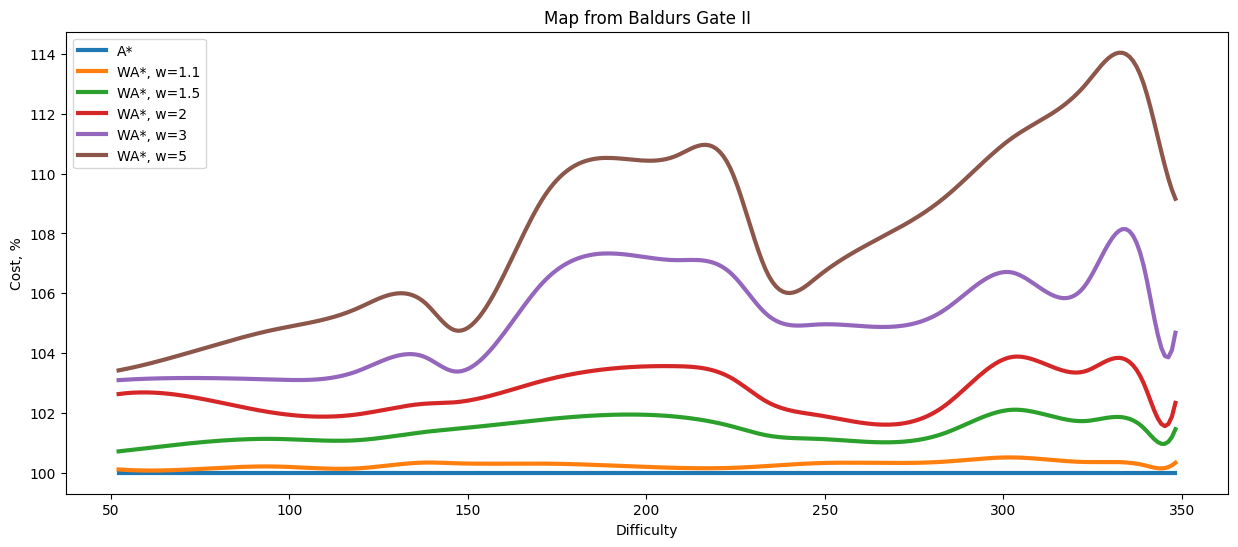

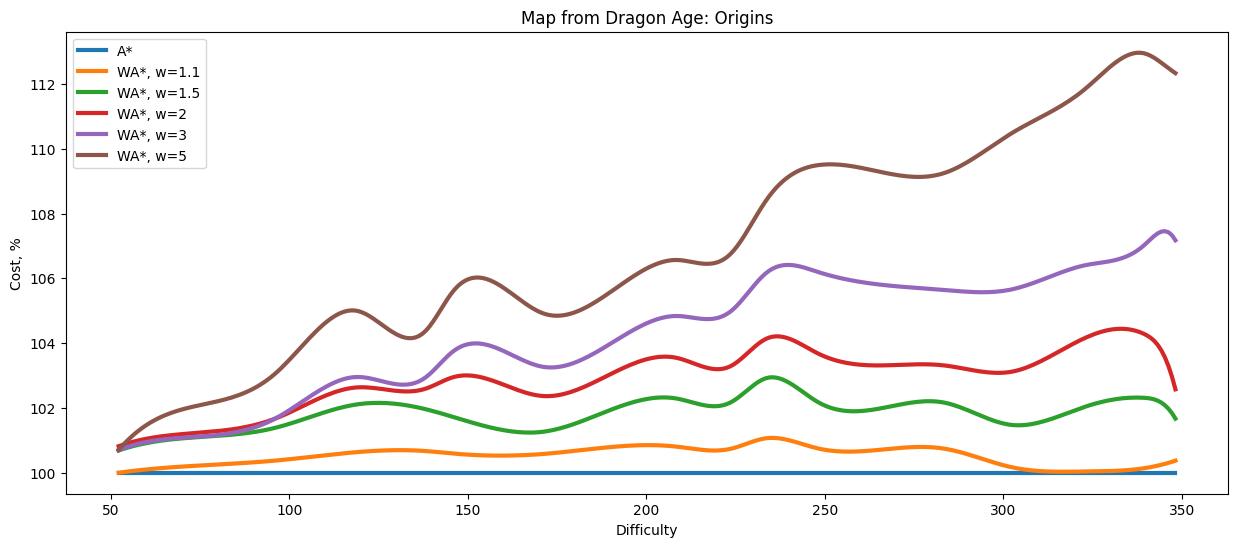

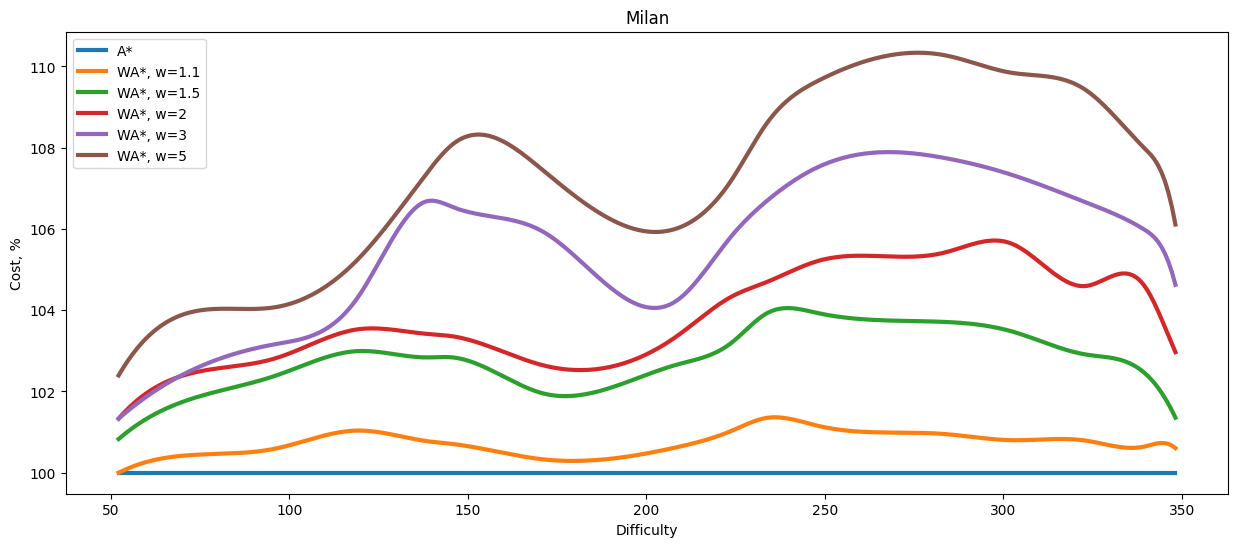

In [151]:
from scipy import interpolate

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
difficulty = np.array([[statistics_astar[(m[2], 1, i)][0] for i in used_tests[m[2]]]*6 for m in maps]).reshape(18, 100)
cost = np.array([[statistics_wastar[(m[2], w, i)][1] for i in used_tests[m[2]]] for m in maps for w in W])

cost = cost[np.arange(cost.shape[0])[:, None], np.argsort(difficulty)]
difficulty = np.sort(difficulty, axis=1)

for m in range(3):
    plt.figure(figsize=(15, 6))
    for j in range(6):
        y = np.array([cost[m*6 + j][i:i+5].mean() for i in range(0, 95, 5)])
        x = np.array([difficulty[m][i:i+5].mean() for i in range(0, 95, 5)])
        y = moving_average(y, window_size=3)
        x = x[2:]
        y = interpolate.interp1d(x, y, kind='cubic')
        x = np.linspace(np.min(x), np.max(x), 300)
        y = y(x)
        if j == 0:
            plt.plot(x, y, label='A*', linewidth=3, linestyle='-')
        else:
            plt.plot(x, y, label=f'WA*, w={W[j]}', linewidth=3, linestyle='-')

    plt.xlabel('Difficulty')
    plt.ylabel('Cost, %')
    plt.title(maps[m][2])
    plt.legend()
    plt.savefig(f'results/graph{m+1}_cost.png', dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()

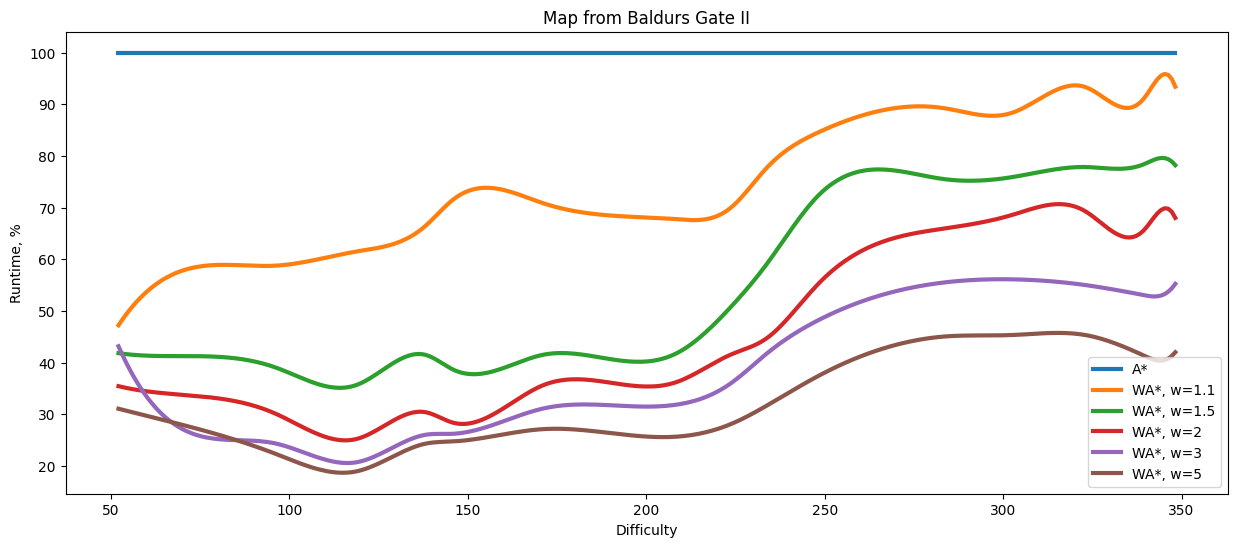

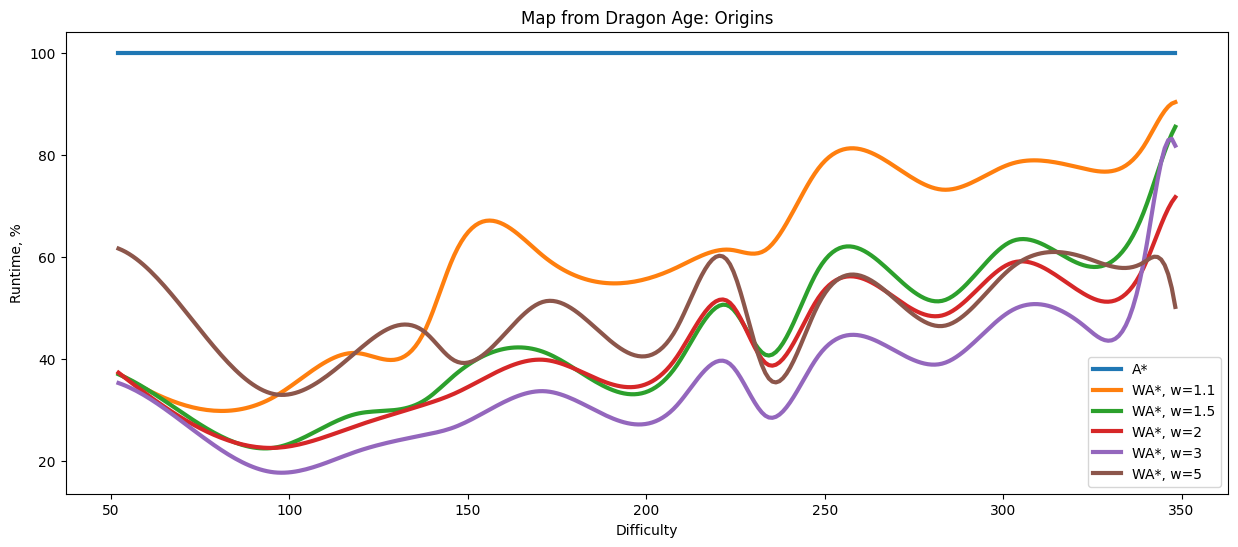

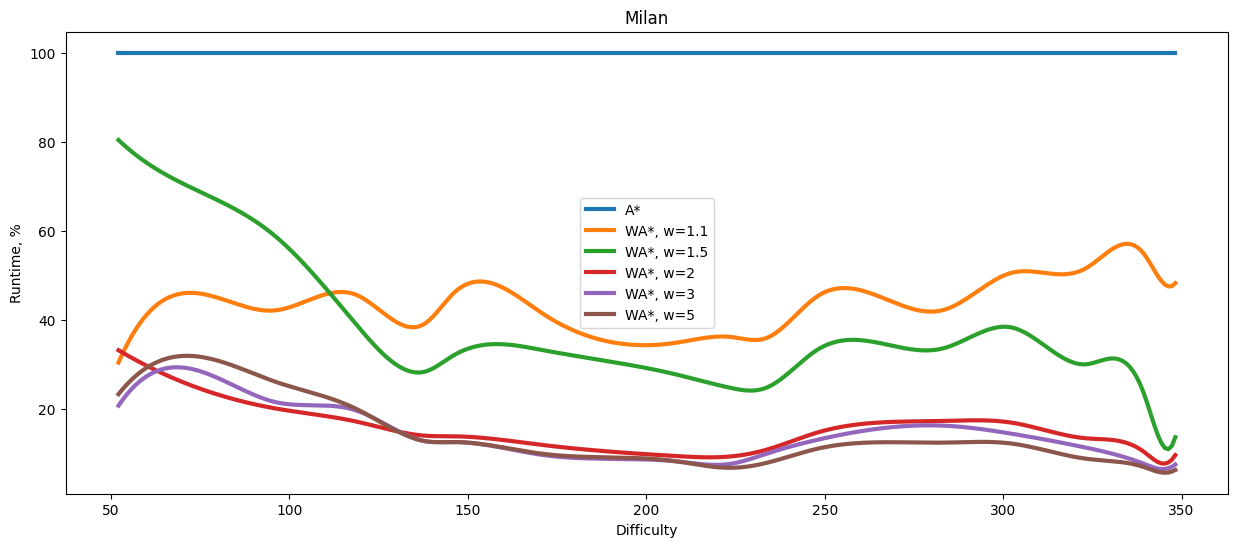

In [152]:
difficulty = np.array([[statistics_astar[(m[2], 1, i)][0] for i in used_tests[m[2]]]*6 for m in maps]).reshape(18, 100)
runtime = np.array([[statistics_wastar[(m[2], w, i)][3] for i in used_tests[m[2]]] for m in maps for w in W])

runtime = runtime[np.arange(cost.shape[0])[:, None], np.argsort(difficulty)]
difficulty = np.sort(difficulty, axis=1)

for m in range(3):
    plt.figure(figsize=(15, 6))
    for j in range(6):
        y = np.array([runtime[m*6 + j][i:i+5].mean() for i in range(0, 95, 5)])
        x = np.array([difficulty[m][i:i+5].mean() for i in range(0, 95, 5)])
        y = moving_average(y, window_size=3)
        x = x[2:]
        y = interpolate.interp1d(x, y, kind='cubic')
        x = np.linspace(np.min(x), np.max(x), 300)
        y = y(x)
        if j == 0:
            plt.plot(x, y, label='A*', linewidth=3, linestyle='-')
        else:
            plt.plot(x, y, label=f'WA*, w={W[j]}', linewidth=3, linestyle='-')

    plt.xlabel('Difficulty')
    plt.ylabel('Runtime, %')
    plt.title(maps[m][2])
    plt.legend()
    plt.savefig(f'results/graph{m+1}_runtime.png', dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()

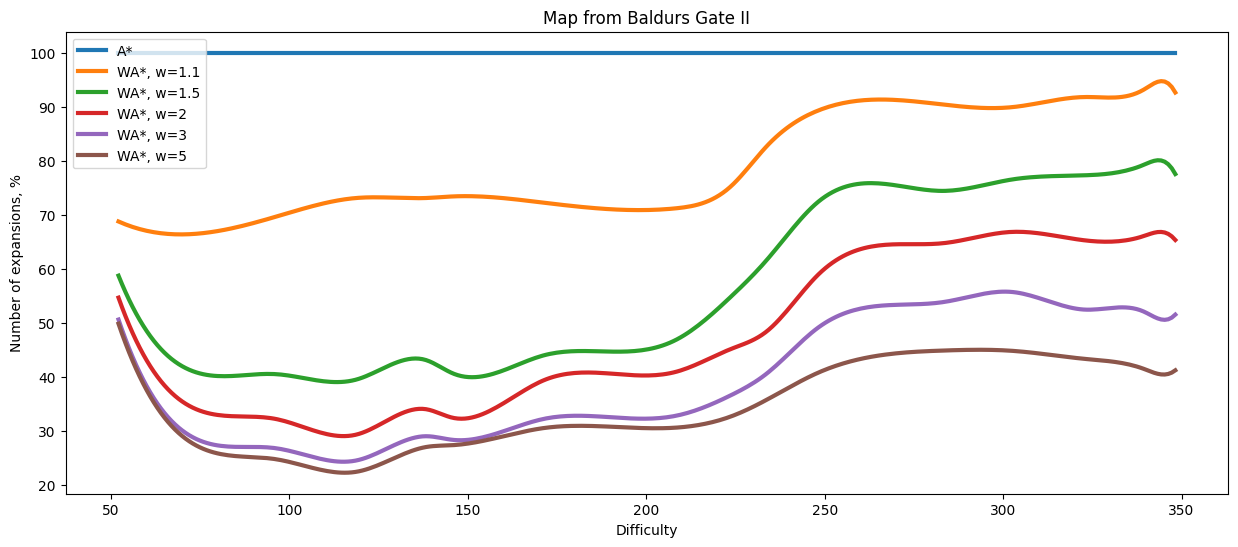

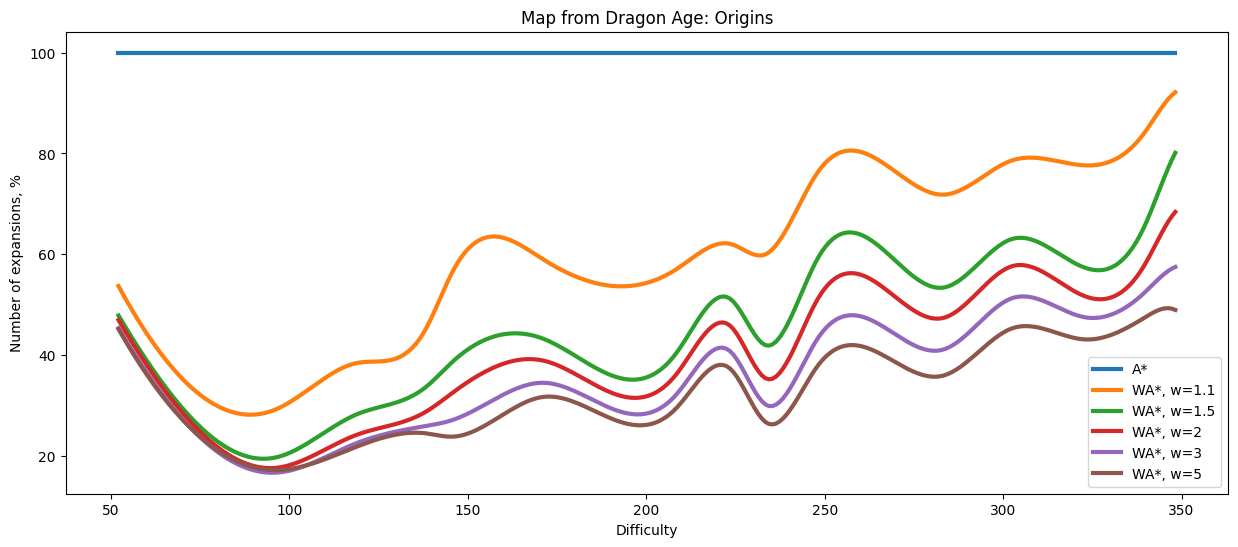

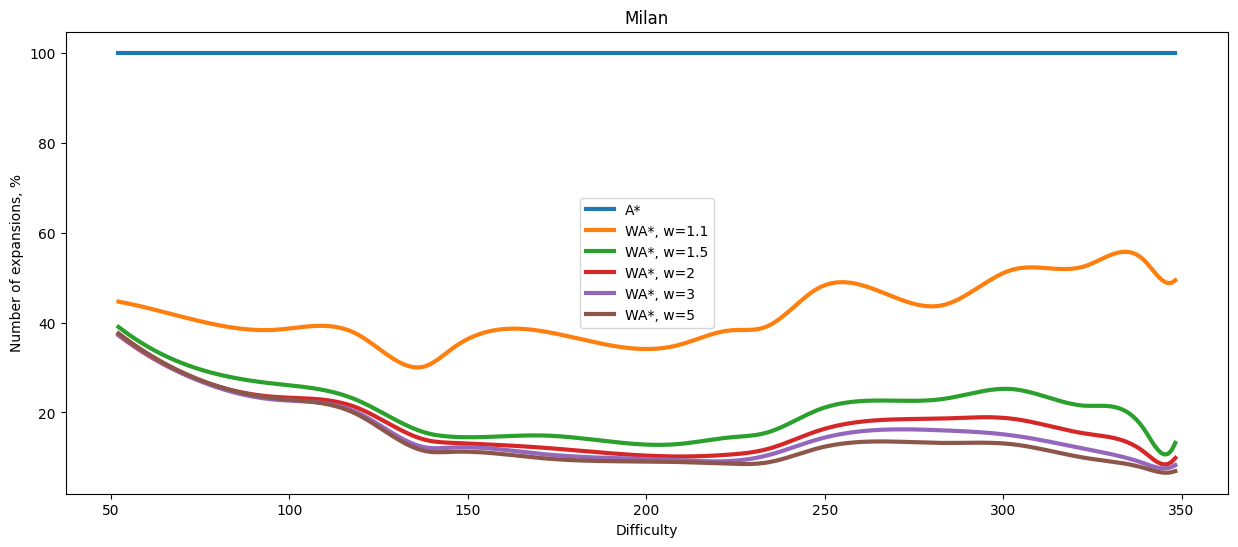

In [153]:
difficulty = np.array([[statistics_astar[(m[2], 1, i)][0] for i in used_tests[m[2]]]*6 for m in maps]).reshape(18, 100)
num_exp = np.array([[statistics_wastar[(m[2], w, i)][2] for i in used_tests[m[2]]] for m in maps for w in W])

num_exp = num_exp[np.arange(cost.shape[0])[:, None], np.argsort(difficulty)]
difficulty = np.sort(difficulty, axis=1)

for m in range(3):
    plt.figure(figsize=(15, 6))
    for j in range(6):
        y = np.array([num_exp[m*6 + j][i:i+5].mean() for i in range(0, 95, 5)])
        x = np.array([difficulty[m][i:i+5].mean() for i in range(0, 95, 5)])
        y = moving_average(y, window_size=3)
        x = x[2:]
        y = interpolate.interp1d(x, y, kind='cubic')
        x = np.linspace(np.min(x), np.max(x), 300)
        y = y(x)
        if j == 0:
            plt.plot(x, y, label='A*', linewidth=3, linestyle='-')
        else:
            plt.plot(x, y, label=f'WA*, w={W[j]}', linewidth=3, linestyle='-')

    plt.xlabel('Difficulty')
    plt.ylabel('Number of expansions, %')
    plt.title(maps[m][2])
    plt.legend()
    plt.savefig(f'results/graph{m+1}_num_exp.png', dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()